In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the generated dataset

df = pd.read_csv('Work_weekday.csv')



In [2]:

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
    DeviceName   Time     Timestamp Activity  RoomName PowerStatus  Day  Hour  \
0       Lights  06:00 -2.208986e+09  AwakeUp   Bedroom          On    1     6   
1  SmartBlinds  06:00 -2.208986e+09  AwakeUp   Bedroom        Open    1     6   
2       Lights  06:05 -2.208986e+09  Bathing  Bathroom          On    1     6   
3  WaterHeater  06:07 -2.208986e+09  Bathing  Bathroom          On    1     6   
4  SmartBlinds  06:07 -2.208986e+09  Bathing  Bathroom       Close    1     6   

   Minute  
0       0  
1       0  
2       5  
3       7  
4       7  


In [3]:

# Summary statistics of numerical columns
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
          Timestamp         Day        Hour      Minute
count  9.600000e+02  960.000000  960.000000  960.000000
mean  -2.208977e+09    3.000000    8.240625   25.375000
std    8.304104e+03    1.414951    2.357827   16.982571
min   -2.208986e+09    1.000000    6.000000    0.000000
25%   -2.208984e+09    2.000000    6.000000   12.000000
50%   -2.208981e+09    3.000000    7.000000   26.000000
75%   -2.208968e+09    4.000000   11.000000   40.000000
max   -2.208962e+09    5.000000   12.000000   59.000000


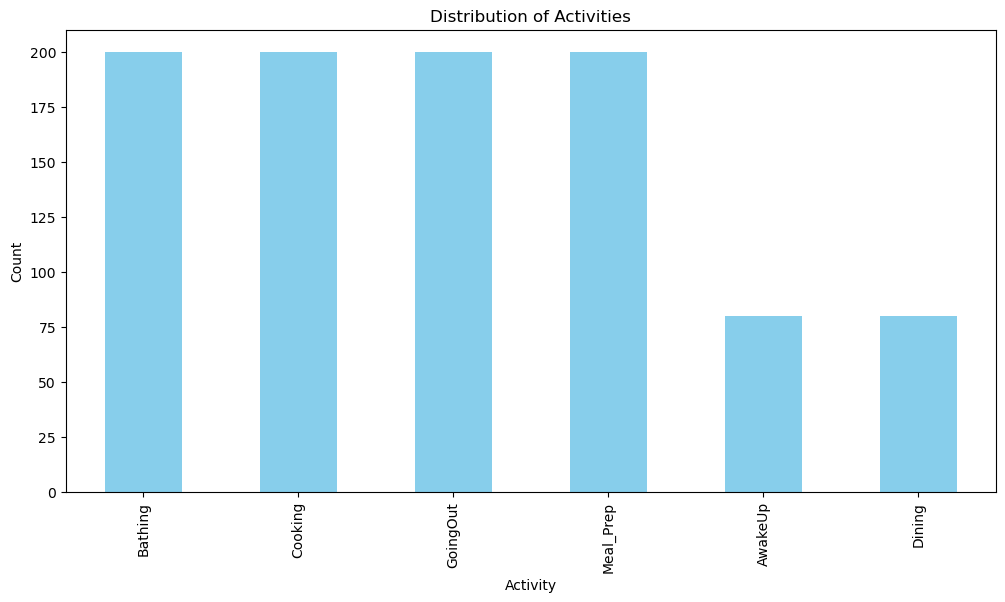

In [4]:

# Distribution of activities
plt.figure(figsize=(12, 6))
df['Activity'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()


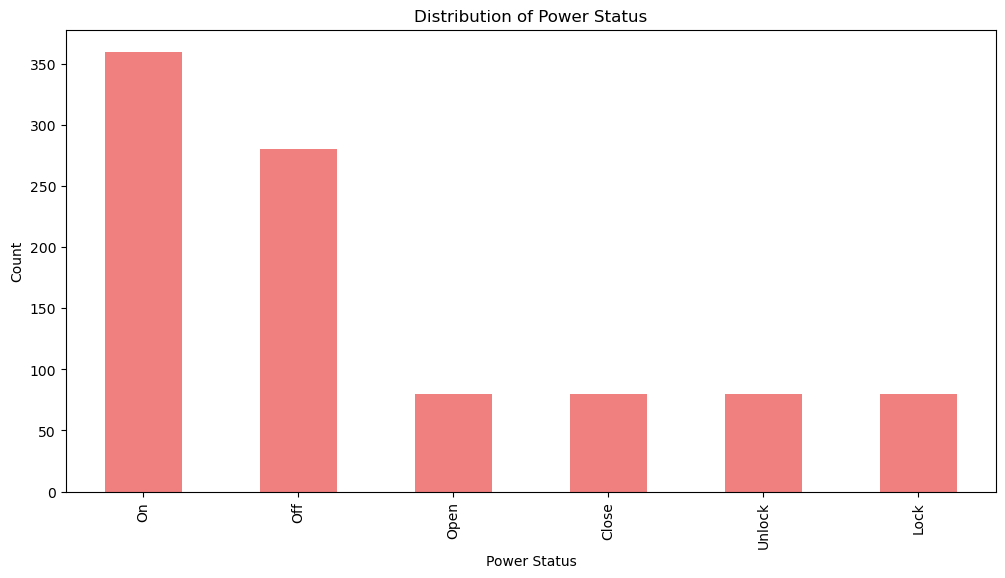

In [5]:

# Distribution of power status
plt.figure(figsize=(12, 6))
df['PowerStatus'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Power Status')
plt.xlabel('Power Status')
plt.ylabel('Count')
plt.show()


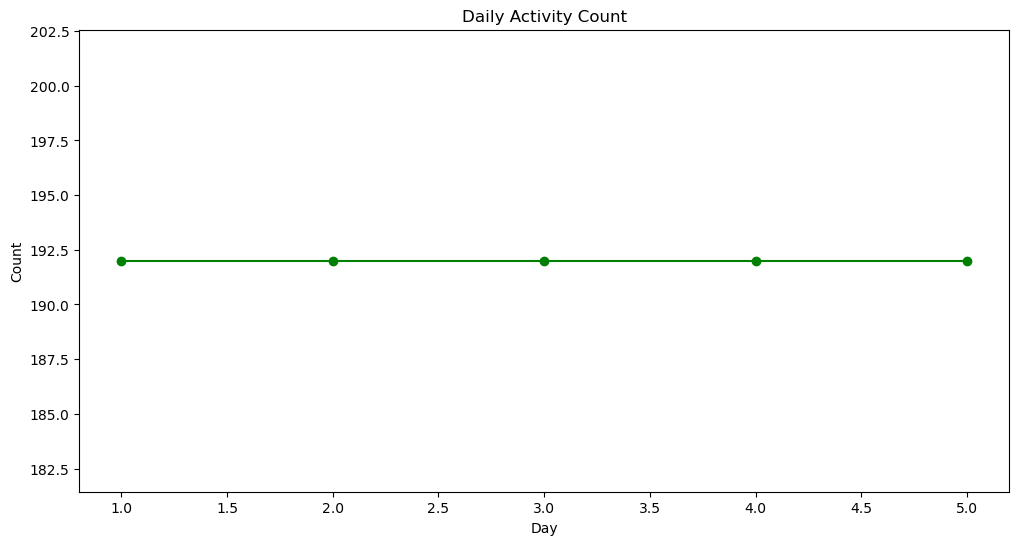

In [6]:

# Daily activity count
daily_activity_count = df.groupby('Day')['Activity'].count()
plt.figure(figsize=(12, 6))
daily_activity_count.plot(kind='line', marker='o', color='green')
plt.title('Daily Activity Count')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()


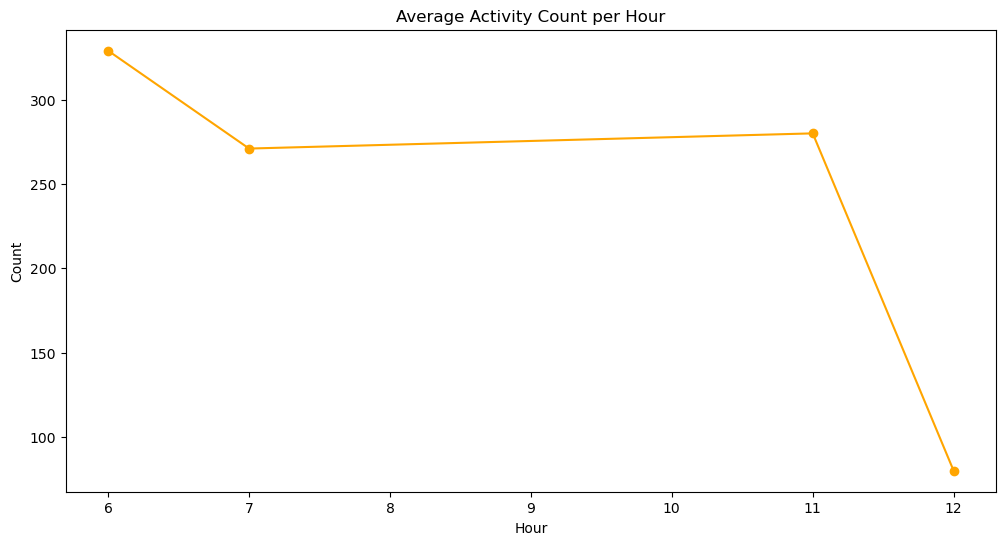

In [7]:

# Average activity count per hour
hourly_activity_count = df.groupby('Hour')['Activity'].count()
plt.figure(figsize=(12, 6))
hourly_activity_count.plot(kind='line', marker='o', color='orange')
plt.title('Average Activity Count per Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')


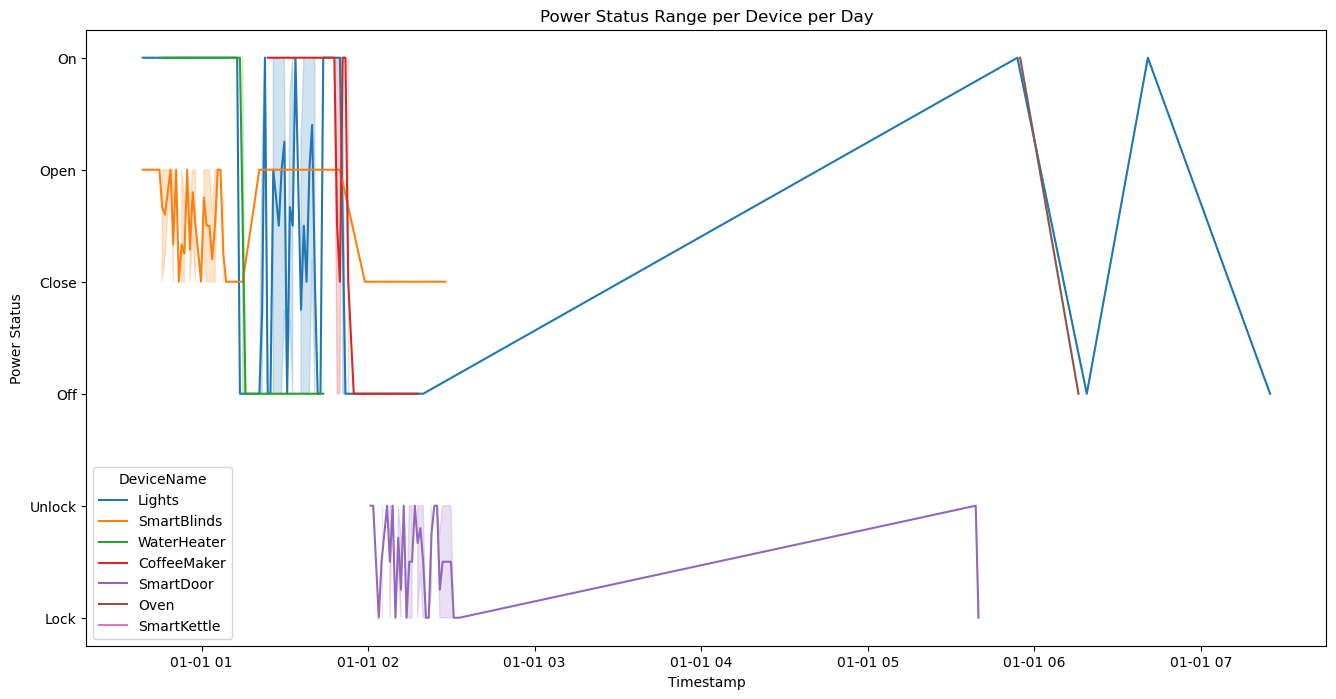

In [9]:

# Plotting the range of power status for each device per day
plt.figure(figsize=(16, 8))
sns.lineplot(x='Timestamp', y='PowerStatus', hue='DeviceName', data=df)
plt.title('Power Status Range per Device per Day')
plt.xlabel('Timestamp')
plt.ylabel('Power Status')
plt.show()


0: 'Open'
1: 'Close'
2: 'On'
3: 'Off'
4: 'Unlock'
5: 'Lock'

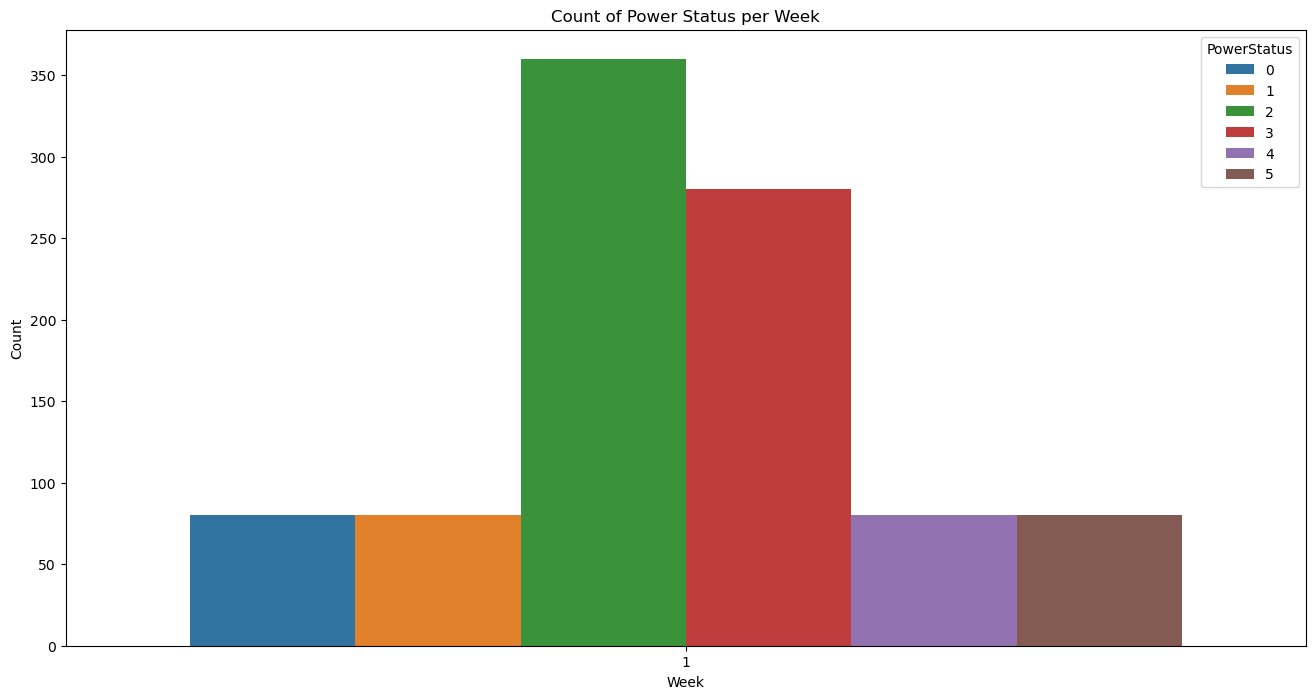

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is already generated using the provided code
# If not, you can run the code to generate the dataset first
# Make sure to adjust the file path accordingly
# df = pd.read_csv('your_generated_dataset.csv')

# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Create a count plot to visualize the power status per week
plt.figure(figsize=(16, 8))
sns.countplot(x='Week', hue='PowerStatus', data=df)
plt.title('Count of Power Status per Week')
plt.xlabel('Week')
plt.ylabel('Count')
plt.show()



In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'df' with columns: 'Timestamp', 'RoomName', 'PowerStatus', 'DeviceName'

# Extract hour and minute from the 'Timestamp' column
df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour
df['Minute'] = pd.to_datetime(df['Timestamp']).dt.minute

# Drop the original 'Timestamp' column
df.drop('Timestamp', axis=1, inplace=True)

# Map categorical variables to numerical values
df['RoomName'] = df['RoomName'].astype('category').cat.codes
df['PowerStatus'] = df['PowerStatus'].astype('category').cat.codes

# Split the data into training and testing sets
X = df[['Hour', 'Minute', 'RoomName', 'PowerStatus']]
y = df['DeviceName']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Function to recommend devices based on input parameters
def recommend_device(hour, minute, room_name, power_status):
    input_data = pd.DataFrame([[hour, minute, room_name, power_status]],
                              columns=['Hour', 'Minute', 'RoomName', 'PowerStatus'])
    input_data['RoomName'] = input_data['RoomName'].astype('category').cat.codes
    input_data['PowerStatus'] = input_data['PowerStatus'].astype('category').cat.codes

    predicted_device = clf.predict(input_data)[0]
    return predicted_device

# Example Usage
hour_input = 7
minute_input = 30
room_name_input = 'LivingRoom'
power_status_input = 'On'

recommended_device = recommend_device(hour_input, minute_input, room_name_input, power_status_input)
print(f'Recommended Device: {recommended_device}')


KeyError: 'Timestamp'

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'df' with columns: 'Time', 'RoomName', 'PowerStatus', 'DeviceName'

# Extract hour and minute from the 'Time' column
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute

# Drop the original 'Time' column
df.drop('Time', axis=1, inplace=True)

# Map categorical variables to numerical values
df['RoomName'] = df['RoomName'].astype('category').cat.codes
df['PowerStatus'] = df['PowerStatus'].astype('category').cat.codes

# Split the data into training and testing sets
X = df[['Hour', 'Minute', 'RoomName', 'PowerStatus']]
y = df['DeviceName']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Function to recommend devices based on input parameters
def recommend_devices(start_hour, end_hour, minute, room_name, power_status):
    hours_range = range(start_hour, end_hour + 1)

    input_data = pd.DataFrame({'Hour': hours_range,
                                'Minute': minute,
                                'RoomName': room_name,
                                'PowerStatus': power_status})

    input_data['RoomName'] = input_data['RoomName'].astype('category').cat.codes
    input_data['PowerStatus'] = input_data['PowerStatus'].astype('category').cat.codes

    predicted_devices = clf.predict(input_data)
    return predicted_devices

# Example Usage for a range of hours from 6 to 7
start_hour_input = 6
end_hour_input = 7
minute_input = 30
room_name_input = 'LivingRoom'
power_status_input = 'On'

recommended_devices = recommend_devices(start_hour_input, end_hour_input, minute_input, room_name_input, power_status_input)
print(f'Recommended Devices: {recommended_devices}')


KeyError: 'Time'

In [36]:
df.head(1)

,DeviceName,Activity,RoomName,PowerStatus,Day,Hour,Minute,Week


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'df' with columns: 'DeviceName', 'Activity', 'RoomName', 'PowerStatus', 'Day', 'Hour', 'Minute', 'Week'

# Map categorical variables to numerical values
df['Activity'] = df['Activity'].astype('category').cat.codes
df['RoomName'] = df['RoomName'].astype('category').cat.codes
df['PowerStatus'] = df['PowerStatus'].astype('category').cat.codes

# Split the data into training and testing sets
X = df[['Hour', 'Minute', 'RoomName', 'PowerStatus']]
y = df['DeviceName']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Function to recommend devices based on input parameters
def recommend_devices(start_hour, end_hour, minute, room_name, power_status):
    hours_range = range(start_hour, end_hour + 1)

    input_data = pd.DataFrame({'Hour': hours_range,
                                'Minute': minute,
                                'RoomName': room_name,
                                'PowerStatus': power_status})

    input_data['RoomName'] = input_data['RoomName'].astype('category').cat.codes
    input_data['PowerStatus'] = input_data['PowerStatus'].astype('category').cat.codes

    predicted_devices = clf.predict(input_data)
    return predicted_devices

# Example Usage for a range of hours from 6 to 7
start_hour_input = 6
end_hour_input = 7
minute_input = 30
room_name_input = 1  # Replace with the actual numerical code for 'RoomName'
power_status_input = 2  # Replace with the actual numerical code for 'PowerStatus'

recommended_devices = recommend_devices(start_hour_input, end_hour_input, minute_input, room_name_input, power_status_input)
print(f'Recommended Devices: {recommended_devices}')


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.